# Actividad 2: Clasificación con máquina de vectores de soporte y redes de neuronas
### _Apellidos_: Ruano Roca, _Nombres_: Miguel Angel Omar

[1. Análisis descriptivo de los datos:](#link-1)
- [1.1  De las variables numéricas, halla datos estadísticos.](#link1-1)
- [1.2 De las variables categóricas, lista las diferentes categorías y 
halla la frecuencia de cada una de ellas.](#link1-2)
- [1.3 Crea matriz de correlaciones existentes entre las 
variables numéricas del conjunto de datos, analiza los resultados.](#link1-3)

[2. Aplica máquina de vectores de soporte y redes neuronales. ](#link2)
- [2.1 Compara, mediante las medidas que te parezcan 
adecuadas, la capacidad predictiva de ambos métodos. ](#link2-1)
- [2.2 Comenta las ventajas y desventajas de cada 
modelo. ](#link2-2)
- [2.3 De acuerdo con los resultados, ¿son realmente útiles los 
modelos creados para el conjunto de datos propuesto? 
(Justificar en base a los resultados experimentales) ](#link2-3)
- [2.4 Otros comentarios que consideres adecuados](#link2-4)

# <a id='link-1'>1. Análisis descriptivo de los datos:</a>

In [1]:
#%% Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Importing the dataset

df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()
train = df.copy().drop(dataset.columns[20], axis=1)
type(train)
train # todas las columnas excepto 'price_range'

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [2]:
train.isnull().sum().sort_values(ascending=False)

battery_power    0
blue             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
px_height        0
pc               0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
wifi             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# <a id='link1-1'>1.1 De las variables numéricas, halla datos estadísticos.</a>

In [4]:
'''
ANALISIS EXPLORATORIO Y PREPROCESAMIENTO
'''
for column in df.columns:
    print("\nDatos estadísticos de ", column)
    print(df[column].describe())


Datos estadísticos de  battery_power
count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

Datos estadísticos de  blue
count    2000.0000
mean        0.4950
std         0.5001
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: blue, dtype: float64

Datos estadísticos de  clock_speed
count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

Datos estadísticos de  dual_sim
count    2000.000000
mean        0.509500
std         0.500035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: dual_sim, dtype: float64

Datos estadísticos de  fc
count    2000.000000
mean        4.309500
std        

In [5]:
df.isnull()
dataNull = df.isnull().sum()
print([dataNull[dataNull > 0]])
print([dataNull[dataNull > 0]/df.shape[0]])

[Series([], dtype: int64)]
[Series([], dtype: float64)]


# <a id='link1-2'>1.2 De las variables categóricas, lista las diferentes categorías y halla la frecuencia de cada una de ellas. </a>

In [6]:
df['price_range'] = df['price_range'].astype(str)
df = df.replace(str(0), 'cero')
df = df.replace(str(1), 'uno')
df = df.replace(str(2), 'dos')
df = df.replace(str(3), 'tres')
'''
Frecuencia de cada clase price_range
'''
dfcat = df.select_dtypes(exclude=['int64', 'float64']) # excluyo todos los valores numericos
print("\nCategorical column")
for col in dfcat.columns:
    print(dfcat[col].name) # imprime el nombre de las categorias
    print(dfcat[col].unique()) # imprime el nombre de los elementos unicos de cada categoria
    print(dfcat[col].value_counts().reset_index(name="freq"))

#df['price_range'].hist()
#df['ram'].hist()
#df['battery_power'].hist()
df = dataset.copy()
df.info()


Categorical column
price_range
['uno' 'dos' 'tres' 'cero']
  index  freq
0  cero   500
1   uno   500
2  tres   500
3   dos   500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w      

<AxesSubplot:>

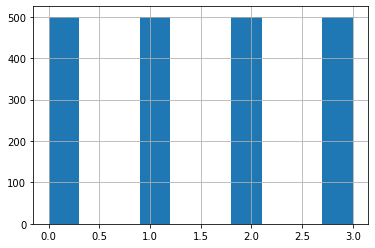

In [7]:
df['price_range'].hist()

<AxesSubplot:>

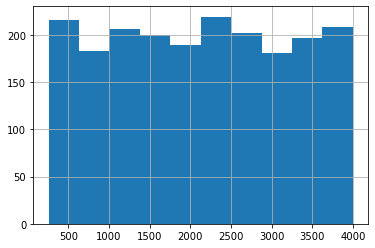

In [8]:
df['ram'].hist()

<AxesSubplot:>

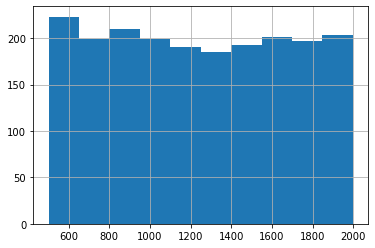

In [9]:
df['battery_power'].hist()

<AxesSubplot:>

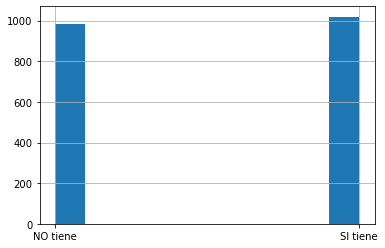

In [10]:
dfdual = df.copy()
dfdual['dual_sim'] = dfdual['dual_sim'].astype(str)
dfdual = dfdual.replace(str(0), 'NO tiene')
dfdual = dfdual.replace(str(1), 'SI tiene')

dfdual['dual_sim'].hist()

# <a id='link1-3'>1.3 Crea matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analiza los resultados.  </a>

## Correlaciones entre variables indepediente y variable objetivo

In [11]:
dfc = dataset.copy()
corr = dfc.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [12]:
print("lista correlaciones con Variable price_range: \n", corr["price_range"].sort_values(ascending=False).round(2))

lista correlaciones con Variable price_range: 
 price_range      1.00
ram              0.92
battery_power    0.20
px_width         0.17
px_height        0.15
int_memory       0.04
sc_w             0.04
pc               0.03
three_g          0.02
sc_h             0.02
fc               0.02
talk_time        0.02
blue             0.02
wifi             0.02
dual_sim         0.02
four_g           0.01
n_cores          0.00
m_dep            0.00
clock_speed     -0.01
mobile_wt       -0.03
touch_screen    -0.03
Name: price_range, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

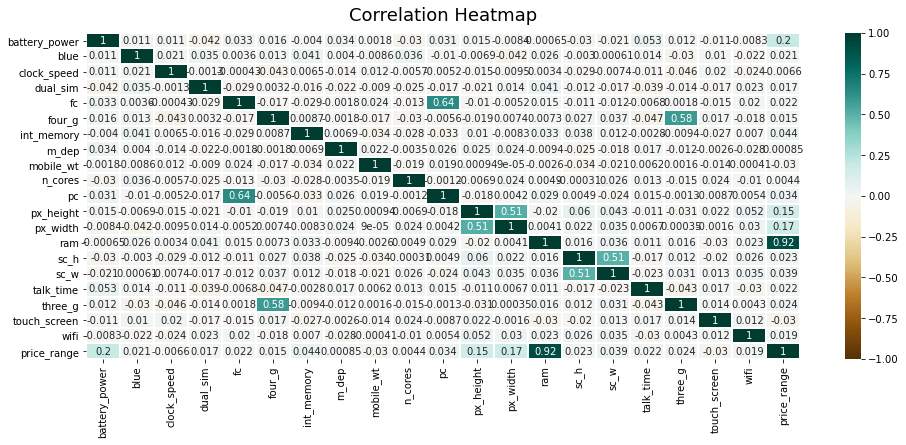

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="BrBG", linecolor='white', linewidths=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

## Correlaciones entre variables.

In [14]:
for column in corr.columns:
    a=corr[column][(corr[column]>.5) & (corr[column]<1)]
    if not a.empty:
        print(corr[column].name)
        print(a, "\n")

fc
pc    0.644595
Name: fc, dtype: float64 

four_g
three_g    0.584246
Name: four_g, dtype: float64 

pc
fc    0.644595
Name: pc, dtype: float64 

px_height
px_width    0.510664
Name: px_height, dtype: float64 

px_width
px_height    0.510664
Name: px_width, dtype: float64 

ram
price_range    0.917046
Name: ram, dtype: float64 

sc_h
sc_w    0.506144
Name: sc_h, dtype: float64 

sc_w
sc_h    0.506144
Name: sc_w, dtype: float64 

three_g
four_g    0.584246
Name: three_g, dtype: float64 

price_range
ram    0.917046
Name: price_range, dtype: float64 



# <a id='link2'>2. Aplica máquina de vectores de soporte y redes neuronales.</a>

# Maquina de vectores de soporte

In [15]:
#%% Dividiendo el dataset entre Training set y test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = dataset.copy()
## train # todas las columnas excepto 'price_range'
train = df.drop(dataset.columns[20], axis=1)
#%Check missing values and set x and y
train.isnull().sum().sort_values(ascending=False)

X = train[['battery_power', 'ram']]
y = dataset["price_range"].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(Xtrain.mean())
print(Xtrain.std())

battery_power    1232.710625
ram              2103.685000
dtype: float64
battery_power     442.100533
ram              1077.413287
dtype: float64


### Con StandardScaler

In [16]:
sc = StandardScaler()
X = sc.fit_transform(train)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(Xtrain.mean())
print(Xtrain.std())

-0.0058802347653078985
0.9999389598415119


In [17]:
print(train.mean())


battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
dtype: float64


In [18]:
print(train.std())

battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
three_g             0.426273
touch_screen        0.500116
wifi                0.500076
dtype: float64


In [19]:
from sklearn import svm
from sklearn import metrics

X = train[['battery_power', 'ram']]
y = dataset["price_range"].values
sc = StandardScaler()
X = sc.fit_transform(train)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

svm_model = svm.SVC(kernel= "linear", random_state = 0)
svm_model.fit(Xtrain, ytrain)
print("Score: ", svm_model.score(Xtrain, ytrain))

# Predictiong the Test set results
predictions = svm_model.predict(Xtest)
print(predictions)

Score:  0.98125
[3 0 2 2 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 0 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 1 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 2 1 2 1 1 0 2 0 1 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0]


### Alternativa

In [20]:
svm_model1 = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
svm_model1.fit(Xtrain, ytrain)
print("Score: ", svm_model1.score(Xtrain, ytrain))
predictions1 = svm_model1.predict(Xtest)
print(predictions1)

Score:  0.98125
[3 0 2 2 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 0 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 1 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 2 1 2 1 1 0 2 0 1 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0]


In [21]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytest, predictions)
print(cnf_matrix)
print("Accurancy:", metrics.accuracy_score(ytest, predictions))
# Otra forma de obtener accurancy
accurancy = np.true_divide(np.sum(predictions == ytest), predictions.shape[0])*100
print(accurancy)


[[ 93   2   0   0]
 [  3  86   3   0]
 [  0   5  89   5]
 [  0   0   1 113]]
Accurancy: 0.9525
95.25


### Aplicando maquina de vectores de soporte sobre los datos de entrenamiento, una 2da corrida

In [22]:
svm_model = svm.SVC(kernel= "linear", random_state = 0)
svm_model.fit(Xtrain, ytrain)
print("Training Score: ", svm_model.score(Xtrain, ytrain))

# Predictiong the Test set results
predictions = svm_model.predict(Xtest)
print(predictions)

Training Score:  0.98125
[3 0 2 2 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 0 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 1 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 2 1 2 1 1 0 2 0 1 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0]


In [23]:
cnf_matrix = confusion_matrix(ytest, predictions)
print(cnf_matrix)
print("Accurancy:", metrics.accuracy_score(ytest, predictions))
# Otra forma de obtener accurancy
accurancy = np.true_divide(np.sum(predictions == ytest), predictions.shape[0])*100
print(accurancy)

[[ 93   2   0   0]
 [  3  86   3   0]
 [  0   5  89   5]
 [  0   0   1 113]]
Accurancy: 0.9525
95.25


In [24]:
print("Training Score: ", svm_model.score(Xtrain, ytrain))

Training Score:  0.98125


In [25]:
from sklearn.model_selection import cross_val_score

accurancies = cross_val_score(estimator = svm_model, X=Xtrain, y=ytrain, cv=10, n_jobs=-1)
print("Accurancy: {:.2f} %".format(accurancies.mean()*100))
print("Standard deviation: {:.2f} %".format(accurancies.std()*100))


Accurancy: 96.25 %
Standard deviation: 1.40 %


### Ploteo de clases 0 y 1 con submuestreo de 5%

Media: -4.4408920985006264e-17
Desviacion Estándar: 0.9999999999999999


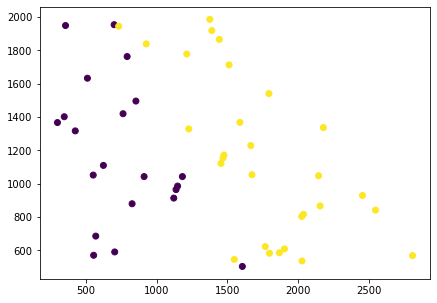

In [26]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import random
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset.copy()
#datos = make_moon(n_samples = 300, noise=0.20, random_state=0)
train = df.drop(df[df['price_range'] >= 2].index)
# train no tiene price_range
train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.05)

sc = StandardScaler()

y = train['price_range']
X = train[['battery_power', 'ram']]
X = sc.fit_transform(train)
type(train)
train.columns

print("Media:", X.mean())
print("Desviacion Estándar:", X.std())

df_x = train['ram']
df_y = train['battery_power']
df_group = y

f, axs = plt.subplots(1,1,figsize=(7, 5))
axs.scatter(df_x, df_y, c=df_group)

### Ploteo de clases 0 y 3 con submuestreo del 10%

-4.4408920985006264e-17
1.0


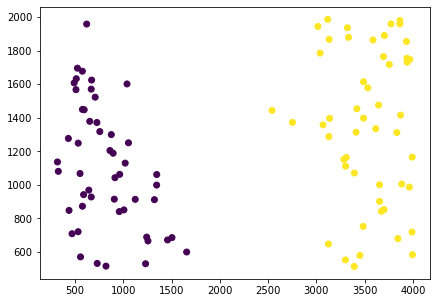

In [61]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import random
import matplotlib.colors as ListedColormap

#df = dataset.copy()
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()

train3 = df.drop(df[df['price_range'] <= 2].index)
train0 = df.drop(df[df['price_range'] >= 1].index)
train = pd.concat([train0, train3], axis=0)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.1)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.scatter(df_x, df_y, c=df_group)

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.mean())
print(X_train.std())


In [64]:
train0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
15,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,...,591,724,1424,15,12,7,1,1,0,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [65]:
train3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3


In [31]:
X_train

array([[-0.82204147,  0.95324439],
       [ 0.9978322 ,  0.14092877],
       [ 0.63736707,  1.16773222],
       [-1.17885077, -1.20076106],
       [-0.8432453 , -0.86305682],
       [ 0.91959738,  0.31890804],
       [-1.07356278, -0.95889181],
       [ 1.33928701, -0.80829397],
       [-1.17519494,  0.4968873 ],
       [-1.18323777,  1.45751897],
       [-0.91270613,  1.21336793],
       [ 1.50087482,  0.03368486],
       [ 1.21498868,  1.15175972],
       [ 1.343674  ,  0.67486656],
       [ 1.31223384,  1.61496216],
       [ 1.43653216, -0.93151038],
       [ 1.14918369,  1.63778002],
       [-1.09915361, -1.26921463],
       [ 1.17477452,  1.62865288],
       [ 1.16600052, -0.73071326],
       [-0.62462649, -0.05986835],
       [ 0.71706423, -0.25382011],
       [-0.74088198, -0.43864473],
       [-0.67288348, -1.22129713],
       [-1.14375478, -0.02107799],
       [-0.66484065,  0.21394591],
       [ 0.87207155,  1.2955122 ],
       [-0.68531332, -1.39014925],
       [ 1.14040969,

In [32]:
X_test

array([[ 0.6432164 ,  1.233904  ],
       [-0.72772098, -0.59836971],
       [ 1.35317917,  1.02626152],
       [-0.80814931,  0.64063978],
       [-1.06186412,  1.62180752],
       [-1.10573411, -1.62060958],
       [-0.62681999,  1.5305361 ],
       [ 1.4467685 , -1.22357892],
       [ 1.448962  , -1.12089857],
       [-0.66191599, -0.47287151],
       [-1.04504729, -1.20760642],
       [ 1.28591184, -1.59322816],
       [ 1.46066066,  1.32289363],
       [-0.44110367, -0.59608792],
       [-0.54054233, -0.79003968],
       [-0.82935314, -1.13458929],
       [ 1.31662084, -0.48199865],
       [-0.91709313, -0.94063752],
       [ 1.47016583,  1.32289363],
       [ 0.05097145, -1.40612175]])

## Preparando el plot de limite de decision

In [33]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

df_pd1 = df_pd.copy()
x_min, x_max = df_pd1['x'].min()-0.1 , df_pd1['x'].max()+0.1
y_min, y_max = df_pd1['y'].min()-0.1 , df_pd1['y'].max()+0.1

def plot_decision_boundary(x, y, labels, model,
                            x_min = x_min,
                            x_max = x_max,
                            y_min = y_min,
                            y_max = y_max,
                            grid_step = 0.2
                            ):
    xx, yy = np.meshgrid(  np.arange(x_min, x_max, grid_step),
                            np.arange(y_min, y_max, grid_step))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:, 2] = arr_hsv[:, 2] * 1.5
    arr_hsv[:, 1] = arr_hsv[:, 1] * .5
    arr_hsv =  np.clip(arr_hsv, 0, 1)
    arr[:, 0: 3] = mpl.colors.hsv_to_rgb(arr_hsv)
    my_cmap = ListedColormap(arr)

    fig, ax = plt.subplots(1, 1, figsize = (7, 7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap, shading='auto')
    ax.scatter(x,y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_xlim(yy.min(), yy.max())
    ax.grid(False)

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]
clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

#plot_decision_boundary(dfx, dfy, y_test, clf)


SVC(C=1, gamma=10, probability=True)

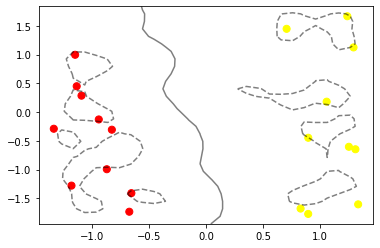

In [66]:
dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]
# plot_decision_boundary(dfx, dfy, y_test, clf)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    '''Plot the decision function for a 2D SVC'''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter( model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(dfx, dfy, c=y_test, s=50, cmap='autumn')
clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

plot_svc_decision_function(clf)

## Mas corridas

### Clase 0 - 2 con submuestreo del 90%

5.674473236973022e-17
1.0


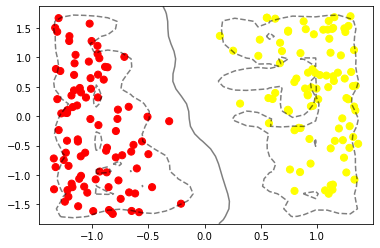

In [79]:
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()

#train3 = df.drop(df[df['price_range'] <= 2].index)
#train0 = df.drop(df[df['price_range'] >= 1].index)

train3 = df.drop(df[df['price_range'] >= 3].index)
train0 = df.drop(df[df['price_range'] >= 1].index)
train2 = df.drop(df[df['price_range'] <= 2].index)

train = pd.concat([train0, train2], axis=0)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.9)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.mean())
print(X_train.std())

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

plt.scatter(dfx, dfy, c=y_test, s=50, cmap='autumn')
clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

plot_svc_decision_function(clf)

### Clase 0 -1 con submuestreo del 90%

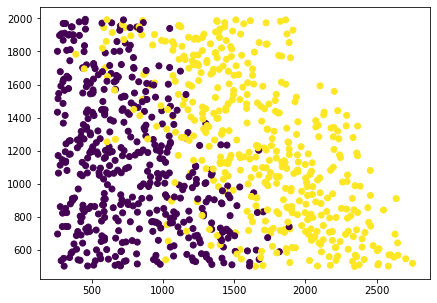

In [82]:
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()
#clase 0 -1 
train = df.drop(df[df['price_range'] >= 2].index)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.9)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

f, axs = plt.subplots(1,1,figsize=(7, 5))
axs.scatter(df_x, df_y, c=df_group)


1.0978872132404326e-16
1.0


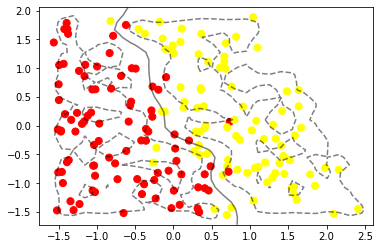

In [85]:

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.mean())
print(X_train.std())

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

plt.scatter(dfx, dfy, c=y_test, s=50, cmap='autumn')
clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

plot_svc_decision_function(clf)

## Definimos parametros y medimos

### Clases 0, 3

In [205]:
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()

train3 = df.drop(df[df['price_range'] <= 2].index)
train0 = df.drop(df[df['price_range'] >= 1].index)
train = pd.concat([train0, train3], axis=0)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.9)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Media:", X_train.mean())
print("STD:" ,X_train.std())

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

Media: 1.9984014443252818e-16
STD: 1.0


SVC(C=1, gamma=10, probability=True)

In [206]:
from sklearn import svm
from sklearn import metrics
print("Score: ", clf.score(X_train, y_train))
predictions = clf.predict(X_train)

predictions = clf.predict(X_test)
predictions

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print(accuracy)

Score:  1.0
[[90  0]
 [ 0 90]]
Accuracy: 1.0
100.0


In [102]:
from sklearn import svm, metrics

print("Score: ", clf.score(X_train, y_train))

predictions = clf.predict(X_train)
predictions = clf.predict(X_test)
predictions

Score:  1.0


array([0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3,
       3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 3], dtype=int64)

### Clases 0, 1

In [115]:
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()

'''
train = df.drop(df[df['price_range'] >= 2].index)
'''
#train3 = df.drop(df[df['price_range'] <= 2].index)
#train0 = df.drop(df[df['price_range'] >= 1].index)
#train = pd.concat([train0, train3], axis=0)
train = df.drop(df[df['price_range'] >= 2].index)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.9)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Media:", X_train.mean())
print("STD:" ,X_train.std())

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

Media: -8.388351741612294e-17
STD: 1.0


SVC(C=1, gamma=10, probability=True)

In [116]:
from sklearn import svm
from sklearn import metrics
print("Score: ", clf.score(X_train, y_train))
predictions = clf.predict(X_train)

predictions = clf.predict(X_test)
predictions

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print(accuracy)

Score:  0.9097222222222222
[[84  7]
 [ 9 80]]
Accuracy: 0.9111111111111111
91.11111111111111


In [117]:
from sklearn import svm, metrics

print("Score: ", clf.score(X_train, y_train))

predictions = clf.predict(X_train)
predictions = clf.predict(X_test)
predictions

Score:  0.9097222222222222


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

## Busqueda de parametros

In [127]:

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

param_grid = {"kernel": ('linear', 'rbf'), "C" : [1, 10, 100]}
base_estimator = svm.SVC()

grid = GridSearchCV(estimator=base_estimator,
                    param_grid=param_grid,
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=5,
                    refit=True)

grid = grid.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print('BEST PARAMS:')
print(grid.best_params_)
print('CV RESULTS:')
print(grid.cv_results_)
print("BEST ESTIMATOR:")
print(grid.best_estimator_)

means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']
print("MEANS TEST SCORE:")
print(means)
print("PARAMS:")
print(params)


Accuracy: 0.8833333333333333
BEST PARAMS:
{'C': 1, 'kernel': 'linear'}
CV RESULTS:
{'mean_fit_time': array([0.00649729, 0.00739975, 0.00893435, 0.01015806, 0.01967497,
       0.01677799]), 'std_fit_time': array([0.00074266, 0.00048963, 0.00079083, 0.00046575, 0.00407248,
       0.00171347]), 'mean_score_time': array([0.00139976, 0.00434103, 0.00163107, 0.00400109, 0.00160036,
       0.00357828]), 'std_score_time': array([4.89493491e-04, 3.66240788e-04, 6.00715440e-04, 5.38931473e-06,
       4.89379060e-04, 4.80899449e-04]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C':

## Mas busqueda de parametros

In [120]:
from sklearn import svm
from sklearn.metrics import classification_report
# con scaling
kernels = ['Polynomial', 'RBF', 'Sigmoid', 'Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return svm.SVC(kernel="poly", degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return svm.SVC(kernel="rbf", gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return svm.SVC(kernel="sigmoid", gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return svm.SVC(kernel="linear", gamma="auto")

for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.20) # Train a SVC model
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test, y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.55      0.87      0.67        67
           1       0.76      0.38      0.50        77

    accuracy                           0.60       144
   macro avg       0.66      0.62      0.59       144
weighted avg       0.66      0.60      0.58       144

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        53
           1       0.98      0.84      0.91        63

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        48
           1       0.80      0.73      0.76        44

    accuracy                           0.78        92
   macro avg       0.78      0.78      0.78     

## Impresion del reporte

In [121]:
from sklearn import metrics, svm
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

clf1 = svm.SVC(C=1, gamma=10, probability=True)
clf1.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, predictions))

param_grid = {"kernel": ('linear', 'rbf', 'poly', 'sigmoid'), "C" : [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001]}
base_estimator = svm.SVC()

best = GridSearchCV(base_estimator, param_grid, cv=5, refit=True, verbose=2).fit(X_train, y_train)
print(r2_score(list(y_test), list(best.predict(X_test))))
#print(grid.best_estimator_)
grid_predictions = best.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, grid_predictions))

Accuracy: 0.918918918918919
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........

## Clase 0-1 submuestreo del 90%

-7.216449660063518e-17
1.0


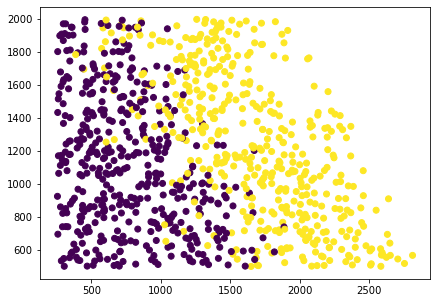

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./train.csv", low_memory=False)
dataset = df
#train = df.drop(dataset.columns[20], axis=1)

train = df.drop(df[df['price_range'] >=2 ].index)
train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.9)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.scatter(df_x, df_y, c=df_group)

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                    df_pd['group'],
                                                    test_size=0.2,
                                                    stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.mean())
print(X_train.std())


In [123]:
param_grid = {"kernel": ('linear', 'rbf', 'poly', 'sigmoid'), "C" : [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001]}
base_estimator = svm.SVC()
best = GridSearchCV(base_estimator, param_grid, cv=5, refit=True, verbose=2).fit(X_train, y_train)
print(r2_score(list(y_test), list(best.predict(X_test))))
print(grid.best_estimator_)
grid_predictions = best.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

Training Score:  0.9125
[[82  8]
 [13 77]]
Testing Accurancy: 0.8833333333333333
88.33333333333333


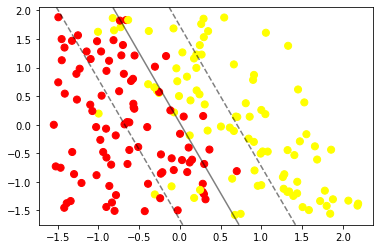

In [124]:
clf = svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
clf
clf.fit(X_train, y_train)

from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix

print("Training Score: ", clf.score(X_train, y_train))
tpredictions = clf.predict(X_train)

predictions = clf.predict(X_test)
predictions

cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Testing Accurancy:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print(accuracy)

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

plt.scatter(dfx, dfy, c=y_test, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# Redes neuronales artificiales RNA

## MLP

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# importing the dataset
df = pd.read_csv("train.csv", low_memory=False)
dataset = df
train = df.drop(dataset.columns[20], axis=1)
X=train # all columns except 'price_range'
y = df['price_range']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=0)
print(Xtrain)
print(Xtest)
print(ytrain)
print(ytest)

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
582            1232     0          2.9         1   1       1          24   
159            1840     0          0.5         1  12       0          34   
1827           1692     0          2.1         0   4       1           2   
318             508     0          0.8         0   7       1          42   
708             977     1          2.8         1   2       0          35   
...             ...   ...          ...       ...  ..     ...         ...   
835            1224     1          1.6         0   9       0          33   
1216           1158     0          0.7         1   1       1          29   
1653           1190     0          2.0         1   0       0          40   
559            1191     0          2.4         1   2       0          13   
684             706     0          0.5         0  13       1          31   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
582     0

In [129]:
print(Xtrain.mean())
print(Xtrain.std())

X_train = Xtrain
y_train = ytrain
mlp = MLPClassifier(hidden_layer_sizes=(3))
mlp.fit(Xtrain,ytrain)
print('Score: ', mlp.score(Xtrain,ytrain))

predictions = mlp.predict(Xtest)
predictions
accurancy = np.true_divide(np.sum(predictions==ytest), predictions.shape[0])*100
print('Accurancy: ', accurancy)

cnf_matrix = confusion_matrix(ytest, predictions)
print('CNFMatrix: \n', cnf_matrix)

mlp = MLPClassifier(hidden_layer_sizes=(4))
mlp.fit(Xtrain,ytrain)
print('Score: ', mlp.score(Xtrain,ytrain))

predictions = mlp.predict(Xtest)
predictions
accurancy = np.true_divide(np.sum(predictions == ytest), predictions.shape[0])*100
print('Accurancy: ', accurancy)
cnf_matrix = confusion_matrix(ytest, predictions)
print('CNFMatrix: \n', cnf_matrix)


-1.5543122344752193e-17
1.0


C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score:  0.766875
Accurancy:  75.5
CNFMatrix: 
 [[ 74  21   0   0]
 [ 40  45   7   0]
 [  0   6  69  24]
 [  0   0   0 114]]
Score:  0.96
Accurancy:  93.75
CNFMatrix: 
 [[ 93   2   0   0]
 [  5  85   2   0]
 [  0   7  85   7]
 [  0   0   2 112]]


C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [130]:
mlp1 = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
                    beta_2=0.999, early_stopping=False, epsilon=1e-08,
                    hidden_layer_sizes=4, learning_rate='constant',
                    learning_rate_init=0.001, max_iter=200, momentum=0.9,
                    n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                    random_state=None, shuffle=True, solver='adam', tol=0.0001,
                    validation_fraction=0.1, verbose=False, warm_start=False)
mlp1.fit(Xtrain,ytrain)

mlp2 = MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
                    beta_2=0.999, early_stopping=False, epsilon=1e-08,
                    hidden_layer_sizes=3, learning_rate='constant',
                    learning_rate_init=0.001, max_iter=200, momentum=0.9,
                    n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                    random_state=None, shuffle=True, solver='adam', tol=0.0001,
                    validation_fraction=0.1, verbose=False, warm_start=False)
mlp2.fit(Xtrain,ytrain)

C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=3)

### MLP Results

In [131]:
print('MLP Score', mlp.score(Xtrain, ytrain))
predictions = mlp.predict(Xtest)

accurancy = np.true_divide(np.sum(predictions==ytest), predictions.shape[0])*100
print('MLP Accurancy', accurancy)

predictions

MLP Score 0.96
MLP Accurancy 93.75


array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 3,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 2, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [132]:
print('MLP1 Score', mlp1.score(Xtrain, ytrain))
predictions1 = mlp1.predict(Xtest)

accurancy1 = np.true_divide(np.sum(predictions1==ytest), predictions1.shape[0])*100
print('MLP1 Accurancy', accurancy1)

predictions1

MLP1 Score 0.864375
MLP1 Accurancy 83.25


array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 0, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3, 2, 1, 3,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 1, 1,
       2, 3, 1, 2, 3, 0, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 3, 2, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 3, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 0, 1, 3, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3, 3, 1, 0, 3, 1, 1, 3, 3, 0,
       1, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 0, 3, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 3, 3, 3, 1, 0, 3, 0, 0, 0, 3, 3, 1, 2, 2, 0, 1, 0, 3,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 0, 0, 2, 3, 3, 3, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 3, 2, 1, 0, 2, 1, 1, 0, 0,
       3, 2, 2, 3, 0, 1, 3, 0, 1, 3, 3, 0, 2, 0, 0,

## Keras y Tensorflow

In [170]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

df_scaled
type(df_scaled)

numpy.ndarray

In [171]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['price_range'] = df['price_range']

In [172]:
dataEncoded = pd.get_dummies(df_scaled, columns = ['price_range'])
print(dataEncoded)

      battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0         -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1         -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2         -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3         -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4          1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   
...             ...       ...          ...       ...       ...       ...   
1995      -1.011860  1.010051    -1.253064  0.981177 -0.992890  0.957886   
1996       1.653694  1.010051     1.321096  0.981177 -0.992890 -1.043966   
1997       1.530773 -0.990050    -0.762748  0.981177 -0.762495  0.957886   
1998       0.622527 -0.990050    -0.762748 -1.019184 -0.071307  0.957886   
1999      -1.658331  1.010051     0.585621  0.981177  0.159088  0.957886   

      int_memory     m_dep  mobile_wt   n_cores  ...      sc_h      sc_w  \
0      -1.3

## Con 2 clases

In [176]:
df = pd.read_csv("train.csv", low_memory=False)
dataset = df
train = df.drop(dataset.columns[20], axis=1)
#train = dataEncoded.copy()
X=train # all columns except 'price_range'
y = df['price_range']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

print(Xtrain.mean())
print(Xtrain.std())
print(Xtrain.shape)

print(Xtest.shape)

-1.5543122344752193e-17
1.0
(1600, 20)
(400, 20)


In [177]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from numpy.random import seed

newY = y.copy()
newY = newY.replace(1, 0)
newY = newY.replace(3, 2)
newY = newY/2
X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(3, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True)
score = model.evaluate( X_test, y_test )
print("score = ", score)



Epoch 1/100
320/320 [==============================] - 0s 920us/step - loss: 0.7200 - accuracy: 0.4925
Epoch 2/100
320/320 [==============================] - 0s 1ms/step - loss: 0.6280 - accuracy: 0.6587
Epoch 3/100
320/320 [==============================] - 0s 827us/step - loss: 0.5497 - accuracy: 0.7969
Epoch 4/100
320/320 [==============================] - 0s 956us/step - loss: 0.4591 - accuracy: 0.8719
Epoch 5/100
320/320 [==============================] - 0s 884us/step - loss: 0.3634 - accuracy: 0.9337
Epoch 6/100
320/320 [==============================] - 0s 815us/step - loss: 0.2832 - accuracy: 0.9519
Epoch 7/100
320/320 [==============================] - 0s 839us/step - loss: 0.2197 - accuracy: 0.9638
Epoch 8/100
320/320 [==============================] - 0s 871us/step - loss: 0.1714 - accuracy: 0.9731
Epoch 9/100
320/320 [==============================] - 0s 860us/step - loss: 0.1364 - accuracy: 0.9781
Epoch 10/100
320/320 [==============================] - 0s 848us/step - los

In [164]:
newY = y.copy()
newY = newY.replace(1, 0)
newY = newY.replace(3, 2)
newY = newY/2
X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

seed(1)

model = Sequential()
model.add(Dense(2, input_dim=20, activation='relu'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True)
score = model.evaluate( X_test, y_test )
print("score = ", score)


Epoch 1/100
320/320 [==============================] - 0s 749us/step - loss: 0.6722 - accuracy: 0.6413
Epoch 2/100
320/320 [==============================] - 0s 715us/step - loss: 0.5441 - accuracy: 0.8331
Epoch 3/100
320/320 [==============================] - 0s 738us/step - loss: 0.3825 - accuracy: 0.9444
Epoch 4/100
320/320 [==============================] - 0s 685us/step - loss: 0.2559 - accuracy: 0.9706
Epoch 5/100
320/320 [==============================] - 0s 715us/step - loss: 0.1758 - accuracy: 0.9819
Epoch 6/100
320/320 [==============================] - 0s 728us/step - loss: 0.1291 - accuracy: 0.9856
Epoch 7/100
320/320 [==============================] - 0s 766us/step - loss: 0.1004 - accuracy: 0.9875
Epoch 8/100
320/320 [==============================] - 0s 742us/step - loss: 0.0802 - accuracy: 0.9900
Epoch 9/100
320/320 [==============================] - 0s 723us/step - loss: 0.0688 - accuracy: 0.9912
Epoch 10/100
320/320 [==============================] - 0s 718us/step - l

Epoch 1/100
320/320 [==============================] - 0s 974us/step - loss: 63.0021 - accuracy: 0.4094
Epoch 2/100
320/320 [==============================] - 0s 1ms/step - loss: 1.4096 - accuracy: 0.4756
Epoch 3/100
320/320 [==============================] - 0s 990us/step - loss: 0.7169 - accuracy: 0.5013
Epoch 4/100
320/320 [==============================] - 0s 856us/step - loss: 0.6939 - accuracy: 0.5025
Epoch 5/100
320/320 [==============================] - 0s 831us/step - loss: 0.6885 - accuracy: 0.5000
Epoch 6/100
320/320 [==============================] - 0s 779us/step - loss: 0.6785 - accuracy: 0.5506
Epoch 7/100
320/320 [==============================] - 0s 818us/step - loss: 0.6727 - accuracy: 0.5656
Epoch 8/100
320/320 [==============================] - 0s 841us/step - loss: 0.6672 - accuracy: 0.5669
Epoch 9/100
320/320 [==============================] - 0s 822us/step - loss: 0.6638 - accuracy: 0.5788
Epoch 10/100
320/320 [==============================] - 0s 899us/step - lo

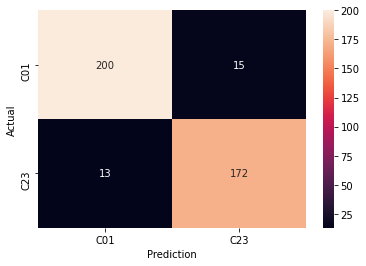

<Figure size 432x288 with 0 Axes>

In [178]:
newY = y.copy()
newY = newY.replace(1, 0)
newY = newY.replace(3, 2)
newY = newY/2
X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size=0.2)
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(2, input_dim=20, activation='relu'))
#model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True)
score = model.evaluate( X_test, y_test )
print("score = ", score)

y_test_pred = model.predict(X_test)
y_final_pred = np.round(y_test_pred)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_final_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['C01', 'C23'], yticklabels=['C01', 'C23'], fmt='d')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

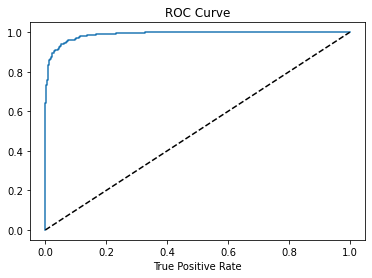

AUC:  0.9886016773352299


<Figure size 432x288 with 0 Axes>

In [286]:
from sklearn.metrics import roc_curve

y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()
auc = np.trapz(TPR, FPR)
print("AUC: ", auc)

# <a id='link2-1'>2.1. Compara, mediante las medidas que te parezcan adecuadas, la capacidad predictiva de ambos métodos.</a>

## Con SVM, Clase 0-1 con muestreo del 20%

Media: 7.216449660063518e-17
STD: 1.0


<ipython-input-66-be48356269ba>:20: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, P, colors='k',


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

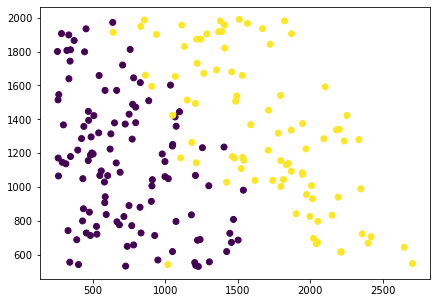

In [602]:

#df = dataset.copy()
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()

#train3 = df.drop(df[df['price_range'] <= 2].index)
#train0 = df.drop(df[df['price_range'] >= 1].index)
#train = pd.concat([train0, train3], axis=0)
train = df.drop(df[df['price_range'] >= 2].index)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.2)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.scatter(df_x, df_y, c=df_group)

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Media:", X_train.mean())
print("STD:" ,X_train.std())

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)
plot_svc_decision_function(clf)

predictions = clf.predict(X_test)
predictions


## Precision y error

Training Score:  0.9625
[[21  2]
 [ 2 15]]
Accurancy score: 0.9
Accurancy 90.0
RMSE: 0.31622776601683794
[0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1]
AUC:  0.8976982097186701


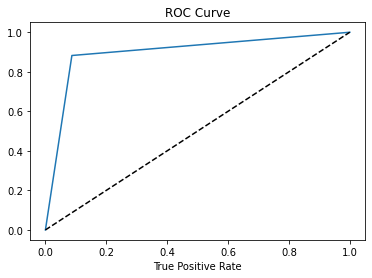

<Figure size 432x288 with 0 Axes>

In [603]:
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix

print("Training Score: ", clf.score(X_train, y_train))
tpredictions = clf.predict(X_train)

predictions = clf.predict(X_test)
predictions

cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Accurancy score:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print("Accurancy", accuracy)

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
predictions = clf.predict(X_test)
print(predictions)

FPR, TPR, _ = roc_curve(y_test, predictions)
auc = np.trapz(TPR, FPR)
print("AUC: ", auc)

plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()



## Con redes neuronales usando MLP, Clases 0 - 1, muestreo del 20%

Score:  0.7625
Accurancy:  80.0
CNFMatrix: 
 [[18  1]
 [ 7 14]]
RMSE: 0.4472135954999579
[0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 0 0]


C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


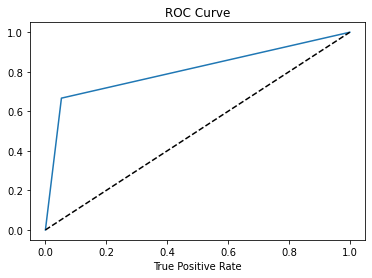

AUC:  0.8070175438596492


<Figure size 432x288 with 0 Axes>

In [613]:
df = pd.read_csv("train.csv", low_memory=False)
dataset = df
#train = df.drop(dataset.columns[20], axis=1)
#X=train # all columns except 'price_range'
#y = df['price_range']

train = df.drop(df[df['price_range'] >= 2].index)
train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.2)

y = train['price_range']
X = train[['battery_power', 'ram']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(4))
mlp.fit(X_train,y_train)
print('Score: ', mlp.score(X_train,y_train))

predictions = mlp.predict(X_test)
predictions
accurancy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print('Accurancy: ', accurancy)
cnf_matrix = confusion_matrix(y_test, predictions)
print('CNFMatrix: \n', cnf_matrix)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(predictions)

FPR, TPR, _ = roc_curve(y_test, predictions, pos_label = 0)
plt.plot(TPR, FPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()

auc = np.trapz(FPR, TPR)
print("AUC: ", auc)



## Con redes neuronales usando KERAS, clase 0 - 1

In [620]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from numpy.random import seed

df = pd.read_csv("train.csv", low_memory=False)
dataset = df
train = df.drop(dataset.columns[20], axis=1)
X=train # all columns except 'price_range'
y = df['price_range']

newY = y.copy()
newY = newY.replace(1, 0)
newY = newY.replace(3, 2)
newY = newY/2

newY = newY.sample(frac=0.20)
X = X.sample(frac=0.20)

X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

model = Sequential()
model.add(Dense(3, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True, validation_data=(X_test, y_test))
score = model.evaluate( X_test, y_test )
print("score = ", score)


Epoch 1/100
64/64 [==============================] - 0s 5ms/step - loss: 0.7954 - accuracy: 0.5031 - val_loss: 0.7422 - val_accuracy: 0.5000
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 0.7740 - accuracy: 0.5188 - val_loss: 0.7291 - val_accuracy: 0.5125
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 0.7571 - accuracy: 0.5250 - val_loss: 0.7197 - val_accuracy: 0.5125
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.7428 - accuracy: 0.5375 - val_loss: 0.7125 - val_accuracy: 0.5000
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.5500 - val_loss: 0.7064 - val_accuracy: 0.5125
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.5406 - val_loss: 0.7023 - val_accuracy: 0.5250
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.5437 - val_loss: 0.6994 - val_accuracy: 0.5500
Epoch 8/100
6

In [618]:
score = model.evaluate( X_test, y_test )
print("Training Score: ", score)
predictions = model.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(predictions)


3/3 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.4625
Training Score:  [0.7801129817962646, 0.4625000059604645]
RMSE: 0.5382679719301907
[[0.2393283 ]
 [0.58159244]
 [0.44024462]
 [0.58159244]
 [0.3329395 ]
 [0.23308608]
 [0.12260678]
 [0.46006566]
 [0.62766397]
 [0.58159244]
 [0.41142368]
 [0.5238369 ]
 [0.44099477]
 [0.5410012 ]
 [0.5144972 ]
 [0.9354929 ]
 [0.2404674 ]
 [0.6857197 ]
 [0.4746142 ]
 [0.37147114]
 [0.4930317 ]
 [0.15263519]
 [0.19518405]
 [0.42898524]
 [0.13342115]
 [0.46587533]
 [0.3709383 ]
 [0.21478495]
 [0.6698106 ]
 [0.8023808 ]
 [0.60350096]
 [0.512471  ]
 [0.52332926]
 [0.40120944]
 [0.40446743]
 [0.50794   ]
 [0.45150965]
 [0.25617105]
 [0.58159244]
 [0.6694145 ]
 [0.21220887]
 [0.58159244]
 [0.58159244]
 [0.58159244]
 [0.49745747]
 [0.6103487 ]
 [0.80052483]
 [0.7540597 ]
 [0.44747844]
 [0.71928966]
 [0.49346817]
 [0.62356967]
 [0.50480694]
 [0.2947554 ]
 [0.4175768 ]
 [0.2170687 ]
 [0.16885376]
 [0.58159244]
 [0.5107184 ]
 [0.25

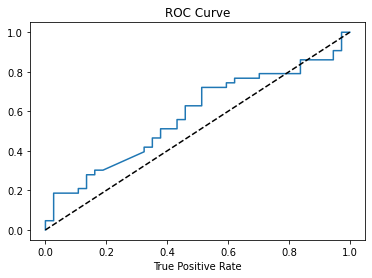

AUC:  0.5776241357636706


<Figure size 432x288 with 0 Axes>

In [621]:
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()

auc = np.trapz(TPR, FPR)
print("AUC: ", auc)

# Usando submuestreo del 80%

## Con SVM, Clase 0-1 con muestreo del 80%

Media: -3.400058012914542e-17
STD: 1.0
Training Score:  0.90625
[[73  7]
 [ 6 74]]
Accurancy score: 0.91875
Accurancy 91.875
RMSE: 0.2850438562747845
[0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 1 1 1 1 0 0 0]


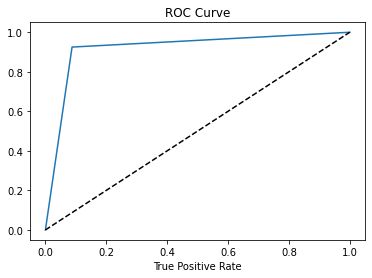

AUC:  0.91875


<Figure size 432x288 with 0 Axes>

In [593]:

#df = dataset.copy()
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()

#train3 = df.drop(df[df['price_range'] <= 2].index)
#train0 = df.drop(df[df['price_range'] >= 1].index)
#train = pd.concat([train0, train3], axis=0)
train = df.drop(df[df['price_range'] >= 2].index)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.8)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Media:", X_train.mean())
print("STD:" ,X_train.std())

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions

from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix

print("Training Score: ", clf.score(X_train, y_train))
tpredictions = clf.predict(X_train)

predictions = clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Accurancy score:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print("Accurancy", accuracy)

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print(predictions)

FPR, TPR, _ = roc_curve(y_test, predictions)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()

auc = np.trapz(TPR, FPR)
print("AUC: ", auc)

Score:  0.8640625
Accurancy:  86.875
CNFMatrix: 
 [[80  3]
 [18 59]]
RMSE: 0.362284418654736
[0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 1 1 0 0 1 1 0 1 0 1]


C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


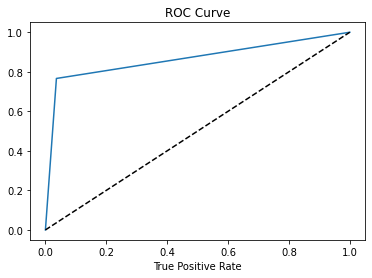

AUC:  0.8650445939602567


<Figure size 432x288 with 0 Axes>

In [594]:
df = pd.read_csv("train.csv", low_memory=False)
dataset = df
#train = df.drop(dataset.columns[20], axis=1)
#X=train # all columns except 'price_range'
#y = df['price_range']

train = df.drop(df[df['price_range'] >= 2].index)
train = train[['battery_power', 'ram', 'price_range']]

train = train.sample(frac=0.8)

y = train['price_range']
X = train[['battery_power', 'ram']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(4))
mlp.fit(X_train,y_train)
print('Score: ', mlp.score(X_train,y_train))

predictions = mlp.predict(X_test)
predictions
accurancy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print('Accurancy: ', accurancy)
cnf_matrix = confusion_matrix(y_test, predictions)
print('CNFMatrix: \n', cnf_matrix)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(predictions)

FPR, TPR, _ = roc_curve(y_test, predictions, pos_label = 0)
plt.plot(TPR, FPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()

auc = np.trapz(FPR, TPR)
print("AUC: ", auc)

Epoch 1/100
320/320 [==============================] - 1s 3ms/step - loss: 0.6458 - accuracy: 0.6300 - val_loss: 0.5983 - val_accuracy: 0.6875
Epoch 2/100
320/320 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7669 - val_loss: 0.5110 - val_accuracy: 0.8050
Epoch 3/100
320/320 [==============================] - 0s 922us/step - loss: 0.4531 - accuracy: 0.8550 - val_loss: 0.4090 - val_accuracy: 0.8625
Epoch 4/100
320/320 [==============================] - 0s 913us/step - loss: 0.3482 - accuracy: 0.9137 - val_loss: 0.3150 - val_accuracy: 0.9150
Epoch 5/100
320/320 [==============================] - 0s 875us/step - loss: 0.2619 - accuracy: 0.9456 - val_loss: 0.2390 - val_accuracy: 0.9475
Epoch 6/100
320/320 [==============================] - 0s 828us/step - loss: 0.1972 - accuracy: 0.9606 - val_loss: 0.1841 - val_accuracy: 0.9575
Epoch 7/100
320/320 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9719 - val_loss: 0.1461 - val_accuracy

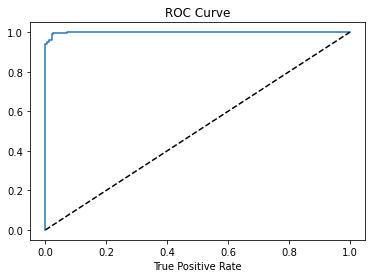

AUC:  0.9987742338961851


<Figure size 432x288 with 0 Axes>

In [623]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from numpy.random import seed

df = pd.read_csv("train.csv", low_memory=False)
dataset = df
train = df.drop(dataset.columns[20], axis=1)
#train3 = df.drop(df[df['price_range'] <= 2].index)
#train0 = df.drop(df[df['price_range'] >= 1].index)
#train = pd.concat([train0, train3], axis=0)

X=train # all columns except 'price_range'
y = df['price_range']

newY = y.copy()
newY = newY.replace(1, 0)
newY = newY.replace(3, 2)
newY = newY/2

#newY = newY.sample(frac=0.80)
#X = X.sample(frac=0.80)

X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

model = Sequential()
model.add(Dense(3, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True, validation_data=(X_test, y_test))

score = model.evaluate( X_test, y_test )
print("Training Score: ", score)
predictions = model.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(predictions)

y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()

auc = np.trapz(TPR, FPR)
print("AUC: ", auc)

# Bibliografia

- https://thecleverprogrammer.com/2021/03/05/mobile-price-classification-with-machine-learning/
- 
